## Обратное распространение ошибки и градиентный спуск

Давайте прежде чем начнем разбирать обратное распространение и градиентный спуск, скажем несколько слов о тех типах архитектур нейронной сети, которые будут использованы в данном уроке. Это простые нейронные сети. С точки зрения архитектуры их можно отнести к полносвязным нейронным сетям так как все нейроны связаны между собой. С другой стороны их можно отнести к нейронным сетям прямого распространения(feed forward). Сети прямого распространения подразумевает распространения сигналы от вход к выходу, в отличии от реккурентных нейронных сетей где во внутренних слоях сигналы могут ходить по циклу. О плюсах и минусах сетей полносвязных мы поговорим в уроке посвященном Сверточным нейронным сетям, поскольку данные нейронные сети отошли от этого подхода и нам нужно будет выяснить почему.

После того как на выходе нейронной сети мы получили определенное цифровое значение нам нужно сравнить его с искомым. Мы можем посчитать насколько в количественом выражение ошиблась нейросеть. Задача обратного распространения ошибки пройтись от выхода ко входу и скорректировать веса нейронов. Это процесс происходит множество раз в процесс обучения.

Можно сказать что процесс обучения нейронной сети это попытка оптимизировать веса 
нейронной сети до тех пор пока не будет достигнута минимальная степень ошибки. Для этого хорошо подходит такой алгоритм как градиентный спуск. Суть данного метода заключается в том, чтобы искать такие числовые параметры при которых значение ошибки достигнет нуля. Градиентным он называется потому что это процесс пошаговый, требующий одно вычисление за другим. Спуском он называется потому что значение ошибки должно быть как можно меньше.


Метод обратного распрасранения (backpropogation) самый популярный способ обучения нейронных сетей, однако у него есть несколько альтернатив - Метод упругого распространения (Resilient propagation или Rprop)  и генетический алгоритм (Genetic Algorithm). Rprop для корректировки весов и смещений использует знак градиента, а не его значение, а генетический алгоритм для задач оптимизации и моделирования использует случайный подбор.


## Пример построения  двухслойной нейронной сети на numpy

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [42]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [43]:
iris_data = load_iris(as_frame=True)
X = iris_data.data
y = iris_data.target

In [44]:
iris_data = X.join(y, how='inner')
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


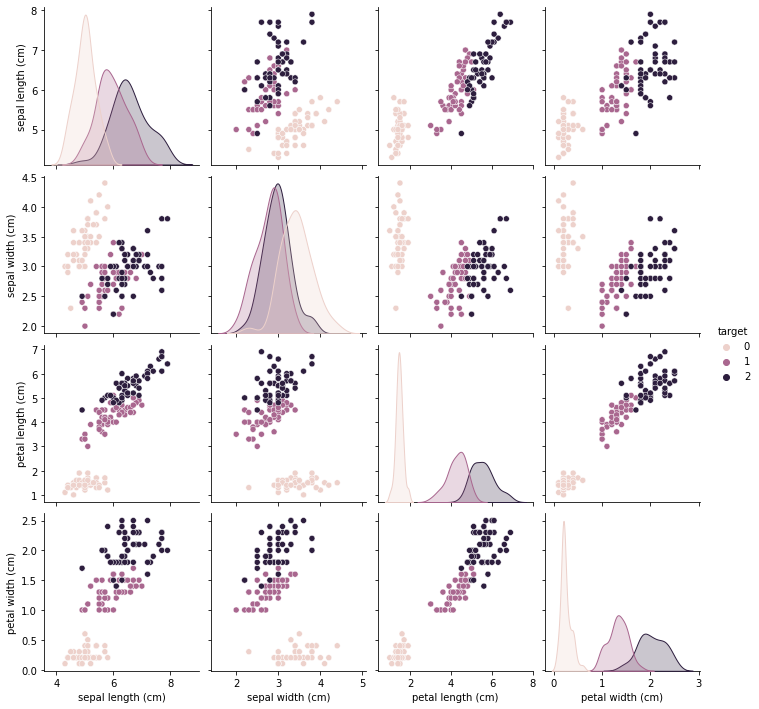

In [45]:
### Шаг 2. Подготовка тренировочных данных
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data, hue="target")
plt.show() # расскоментируйте, чтобы посмотреть
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#x = normalize(x.as_matrix())
X = normalize(X.values)

# формирование выходных данных(результатов)

#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
results = pd.DataFrame(columns=['neuron_numb', 'n_iterations', 'learning_rate', 'train_accuracy', 'test_accuracy'])
s = 0

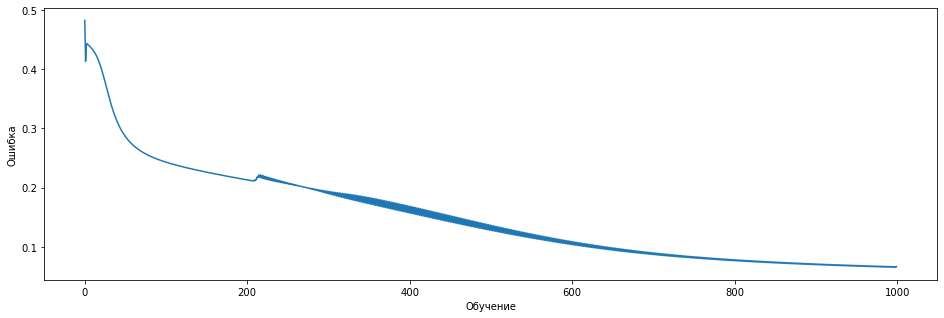

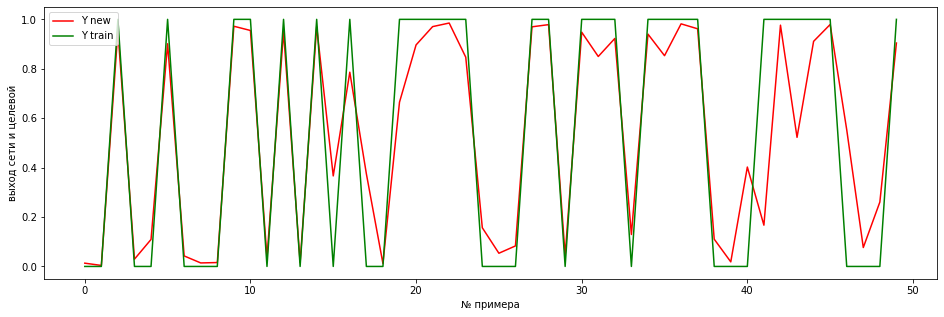

Аккуратность нейронной сети 93.39%


In [77]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 10


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

#количество итераций
n_iterations = 1000

# процесс обучения
for i in range(n_iterations):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


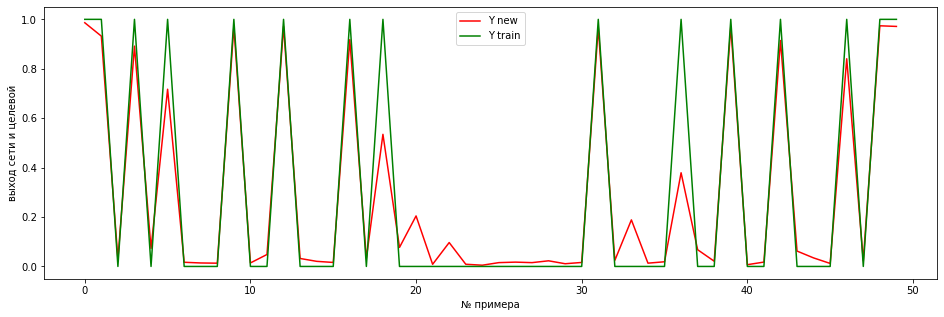

Аккуратность нейронной сети на тесте 96.0%


In [78]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")
results.loc[s] = [neuron_numb, n_iterations, n, accuracy, accuracy_t]
s += 1

In [79]:
results

,neuron_numb,n_iterations,learning_rate,train_accuracy,test_accuracy
0,2.0,10000.0,0.05,83.341171,83.424659
1,5.0,10000.0,0.10,96.973559,98.457611
2,5.0,100.0,0.10,75.269446,74.553392
3,5.0,1000.0,0.10,93.385545,95.765904
4,10.0,1000.0,0.10,93.392951,96.000132


2) Заметим что слишком сложная модель избыточна и дает небольшой прирост точности вместе с тем являясь сильно вычеслительно затратной.
Оптимальное количество нейроннов выбрано 1000.
Скорость обучения 0.1 кажется довольно тривиальноя и стабильное решение
Количество эпох 1000 оказалось достаточным

Если задача требует высокой точности, верным решением будет повыысить количество эпох, так количество нейронов симулирует наши парампетры,
количество которых равна 4. Тем самым нет смысла увеличивать количество нейроннов.

